In [2]:
import lightgbm
import catboost
import yellowbrick
import nltk
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path  = os.getcwd()

In [4]:
f = open(path + '/War_And_Peace.txt').read()   # open the text
# w = f.split()
# print(w[:10])

In [5]:
# Split into Sentences -------

from nltk import sent_tokenize
sentences = sent_tokenize(f)
print(sentences[2])

But I warn you, if you don’t tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by that
Antichrist—I really believe he is Antichrist—I will have nothing
more to do with you and you are no longer my friend, no longer my
‘faithful slave,’ as you call yourself!


In [7]:
# cleaning the Sentences ------

from nltk import word_tokenize
import re

sent_cleaned = []

for i in range(0, len(sentences)):
    letters_only = re.sub("[^a-zA-Z]", " ", sentences[i])
    words = word_tokenize(letters_only)  
    lower_words = [word.lower() for word in words]
    sent_cleaned.append(lower_words)

print(sent_cleaned[3:6])
print('\n', len(sent_cleaned))

[['but', 'how', 'do', 'you', 'do'], ['i', 'see', 'i', 'have', 'frightened', 'you', 'sit', 'down', 'and', 'tell', 'me', 'all', 'the', 'news', 'it', 'was', 'in', 'july', 'and', 'the', 'speaker', 'was', 'the', 'well', 'known', 'anna', 'p', 'vlovna', 'sch', 'rer', 'maid', 'of', 'honor', 'and', 'favorite', 'of', 'the', 'empress', 'm', 'rya', 'f', 'dorovna'], ['with', 'these', 'words', 'she', 'greeted', 'prince', 'vas', 'li', 'kur', 'gin', 'a', 'man', 'of', 'high', 'rank', 'and', 'importance', 'who', 'was', 'the', 'first', 'to', 'arrive', 'at', 'her', 'reception']]

 26547


### N-Grams using NLTK

In [ ]:
import re, string, collections
from nltk.util import ngrams # function for making ngrams

bigrams = ngrams(words, 2)
print(list(bigrams)[:10])

# get the frequency of each bigram in our corpus
bigramFreq = collections.Counter(bigrams)

# what are the ten most popular ngrams?
bigramFreq.most_common(10)

### USING GENSIM

In [ ]:
from gensim.models.phrases import Phrases

bigrams = Phrases(sent_cleaned)
print(bigrams[sent_cleaned[2]])

In [ ]:
bigrams['project gutenberg is one very important project'.split()]

### WORD TO VEC USING GENSIM

**Architecture:**
Architecture options are skip-gram (default) or continuous bag of words. We found that skip-gram was very slightly slower but produced better results.

**Training algorithm:**
Hierarchical softmax (default) or negative sampling.

**Downsampling of frequent words:**
The Google documentation recommends values between .00001 and .001. values

**Word vector dimensionality:**
More features result in longer runtimes, and often, but not always, result in better models. Reasonable values can be in the tens to hundreds

**Context / window size:**
How many words of context should the training algorithm take into account? 10 seems to work well for hierarchical softmax (more is better, up to a point)

**Worker threads:**
Number of parallel processes to run. This is computer-specific, but between 4 and 6 should work on most systems

**Minimum word count:**
This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored.

In [10]:
print(sent_cleaned[:5])

[['the', 'project', 'gutenberg', 'ebook', 'of', 'war', 'and', 'peace', 'by', 'leo', 'tolstoy', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever'], ['you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'title', 'war', 'and', 'peace', 'author', 'leo', 'tolstoy', 'translators', 'louise', 'and', 'aylmer', 'maude', 'posting', 'date', 'january', 'ebook', 'last', 'updated', 'december', 'language', 'english', 'character', 'set', 'encoding', 'utf', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'war', 'and', 'peace', 'an', 'anonymous', 'volunteer', 'and', 'david', 'widger', 'war', 'and', 'peace', 'by', 'leo', 'tolstoy', 'tolstoi', 'contents', 'book', 'one', 'chapter', 'i', 'chapter', 'ii', 'chapter', 'iii', 

In [279]:
from gensim.models import word2vec
bigrams = Phrases(sent_cleaned)
model = word2vec.Word2Vec(bigrams[sent_cleaned], size= 300,  iter = 25)

In [280]:
learned_words = list(model.wv.vocab)
print(len(learned_words))
print(learned_words[:250])

7674
['the', 'project_gutenberg', 'ebook', 'of', 'war', 'and', 'peace', 'by', 'this', 'is', 'for', 'use', 'anyone', 'anywhere', 'at', 'no', 'cost', 'with', 'almost', 'you', 'may', 'copy', 'it', 'give', 'away', 'or', 're', 'under', 'terms', 'license', 'included', 'www', 'gutenberg_org', 'title', 'author', 'date', 'january', 'last', 'december', 'language', 'english', 'character', 'set', 'start', 'an', 'david', 'contents', 'book', 'one', 'chapter', 'i', 'chapter_ii', 'chapter_iii', 'chapter_iv', 'v', 'chapter_vi', 'chapter_vii', 'chapter_viii', 'chapter_ix', 'chapter_x', 'chapter_xi', 'chapter_xii', 'chapter_xiii', 'chapter_xiv', 'chapter_xv', 'chapter_xvi', 'chapter_xvii', 'chapter_xviii', 'chapter_xix', 'chapter_xx', 'chapter_xxi', 'chapter_xxii', 'chapter_xxiii', 'chapter_xxiv', 'chapter_xxv', 'chapter_xxvi', 'chapter_xxvii', 'chapter_xxviii', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'first', 'second'

In [281]:
print(model['project'])

[-0.14514215 -0.04338431 -0.06920157 -0.36236247  0.0656373   0.15002352
  0.28601423 -0.25237313  0.10228983  0.06674651  0.01841544 -0.13933977
 -0.02226907 -0.11385123 -0.11149202 -0.01277517 -0.1055854   0.03904133
  0.13403833  0.01964328  0.05345912 -0.03925696 -0.18697304 -0.04054653
  0.04498734 -0.19764951 -0.29398298  0.04486386 -0.18599753  0.09890824
  0.00837609  0.04172487  0.03332953 -0.2202002  -0.32518634 -0.10326681
 -0.08528043  0.22547413 -0.02833618 -0.12140726  0.13287829  0.00797056
 -0.09631893  0.11695778  0.02960043  0.05904861 -0.06980024 -0.05023947
  0.14030723 -0.06014362  0.00072244  0.10769995 -0.14573005 -0.06450194
 -0.00480031 -0.2067515   0.04766944 -0.10538395  0.06211122  0.02801398
  0.12804733 -0.03750115 -0.05644224 -0.01589645 -0.17424968  0.03210106
  0.06518596 -0.14251724  0.18331547 -0.11730064 -0.04463675 -0.05916226
  0.09417838 -0.19970463  0.10422186  0.06839622 -0.1358118   0.19612698
  0.01531995 -0.30040494 -0.00594454 -0.03075839  0

In [282]:
model.wv.most_similar('project')

[('favor', 0.6536598205566406),
 ('advantage', 0.6423513889312744),
 ('sake', 0.628666877746582),
 ('execution', 0.6259768009185791),
 ('pupil', 0.6246033310890198),
 ('consent', 0.6200554370880127),
 ('blessing', 0.61712646484375),
 ('advice', 0.6168011426925659),
 ('misfortunes', 0.6121727228164673),
 ('ancient_capital', 0.6077005863189697)]

In [283]:
model.wv.syn0.shape

(7674, 300)

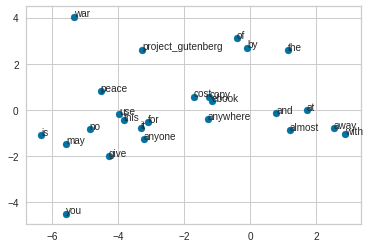

In [284]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:25][:, 0], result[:25][:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words[:25]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [310]:
from sklearn.cluster import KMeans
import time

# average of 5 words per cluster
word_vectors = model.wv.syn0
num_clusters = int(word_vectors.shape[0] /10)

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans(n_clusters = 10)
idx = kmeans_clustering.fit_predict(word_vectors)

In [286]:
model.wv.index2word[:5]

['the', 'and', 'to', 'of', 'a']

In [287]:
print(len(idx))
print(idx.max())
print(len(set(idx)))

7674
766
767


In [311]:
# Create a Word to Cluster mapping                                                                                          
word_centroid_map = dict(zip( model.wv.index2word, idx ))

# For the first 10 clusters
for cluster in range(0,10):
    #
    # Print the cluster number  
    print("\nCluster %d" % cluster)
    #
    # Find all of the words for that cluster number
    words = []
    for key, value in word_centroid_map.items():
        if value == cluster:
            words.append(key)
    print(words)


Cluster 0
['to', 'in', 'by', 'about', 'first', 'without', 'having', 'just', 'last', 'also', 'more_than', 'as_soon', 'just_as', 'should_be', 'rest', 'has_been', 'home', 'giving', 'besides', 'within', 'late', 'probably', 'leaving', 'soon', 'next', 'instead_of', 'de', 'following', 'gentlemen', 'ill', 'splendid', 'a_single', 'poor', 'occupied', 'hardly', 'getting', 'needed', 'enough', 'health', 'prepared', 'might_be', 'at_home', 'la', 'expecting', 'ones', 'yesterday', 'comes', 'might_have', 'as_possible', 'king', 'l', 'further', 'minister', 'able_to', 'wishing', 'none', 'count_rostopch', 'settled', 'somewhere', 're', 'weak', 'bound', 'estate', 'finished', 'note', 'badly', 'very_much', 'bez_khov', 'afterwards', 'presented', 'previously', 'my_father', 'seems', 'every_day', 'begun', 'intended', 'food', 'believed', 'receiving', 'demanded', 'instructions', 'chiefly', 'feared', 'acquaintances', 'had_begun', 'ruined', 'letting', 'preparing', 'day_before', 'departure', 'caused', 'chosen', 'danger

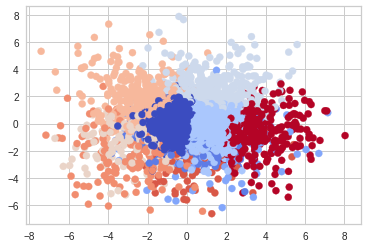

In [312]:
pca = PCA(n_components=2)
res = pca.fit_transform(word_vectors)


# create a scatter plot of the projection
plt.scatter(res[:, 0], res[:, 1], c = idx, s = 50, cmap='coolwarm')

In [295]:
# import seaborn as sns
# from sklearn.metrics.pairwise import euclidean_distances
# euclidean_distances(word_vectors[5].reshape(-1, 1), word_vectors[5].reshape(-1, 1))
# #sns.heatmap(word_vectors[:5])

In [ ]:
# #stemming
# from nltk.stem import PorterStemmer
# from nltk.tokenize import sent_tokenize, word_tokenize

# ps = PorterStemmer()

# for w in words_nostopwords[20:30]:
#     print(ps.stem(w))


# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# print(lemmatizer.lemmatize("sex"))
# print(lemmatizer.lemmatize("sexy"))
# print(lemmatizer.lemmatize("sexiest"))

### LANGUAGE MODEL

In [309]:
# def clean_doc(doc):
#     # replace '--' with a space ' '
#     doc = doc.replace('--', ' ')
#     # split into tokens by white space
#     tokens = doc.split()
#     # remove punctuation from each token
#     table = str.maketrans('', '', string.punctuation)
#     tokens = [w.translate(table) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#     # make lower case
#     tokens = [word.lower() for word in tokens]
#     return tokens

In [301]:
from nltk import word_tokenize

words_cleaned = []

letters_only = re.sub("[^a-zA-Z]", " ", f)

words = word_tokenize(letters_only)  

lower_words = [word.lower() for word in words]

In [305]:
print(len(set(lower_words)))
len(lower_words)

17600


586615

In [306]:
tokens = lower_words

length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 586564


### SPacy

In [296]:
import spacy
nlp = spacy.load('en')
doc = nlp(f[:100000])

for token in doc[20:25]:
    print(token.text)

use
of
anyone
anywhere
at
